## This Notebook aims to answer the following questions:
**Q1: Do movies (a) or shows (b) on Netflix with an older release year have a better average IMDb ratings?**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import pearsonr
from transformers import pipeline
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from typing import Tuple
from scipy.stats import levene

In [3]:
# Data Source: 
# https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores?resource=download
df = pd.read_csv("Netflix TV Shows and Movies.csv")
df.drop(["id", "imdb_id"], axis=1, inplace=True)
df.head()

,index,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


## Q1: Do movies (a) or shows (b) on Netflix with an older release year have a better average IMDb ratings?

In [4]:
def year_rating_r(type: str, data: pd.DataFrame = df,) -> Tuple[float]:
    
    filtered_df = data[data["type"] == type]
    filtered_df_mean = filtered_df.groupby("release_year")["imdb_score"].mean()

    r, p = pearsonr(filtered_df_mean.index, filtered_df_mean)
    
    return filtered_df, filtered_df_mean, r, p

#Movies
movies_df, movies_df_mean, r, p = year_rating_r("MOVIE")
print(f"Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r:.2f}, p = {p:.4f}.\n")

#Shows
shows_df, shows_df_mean, r, p = year_rating_r("SHOW")
print(f"No relationship between the release year and the IMDb ratings were found for Netflix shows, r = {r:.2f}, p = {p:.4f}.")

Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.43, p = 0.0003.

No relationship between the release year and the IMDb ratings were found for Netflix shows, r = 0.01, p = 0.9563.


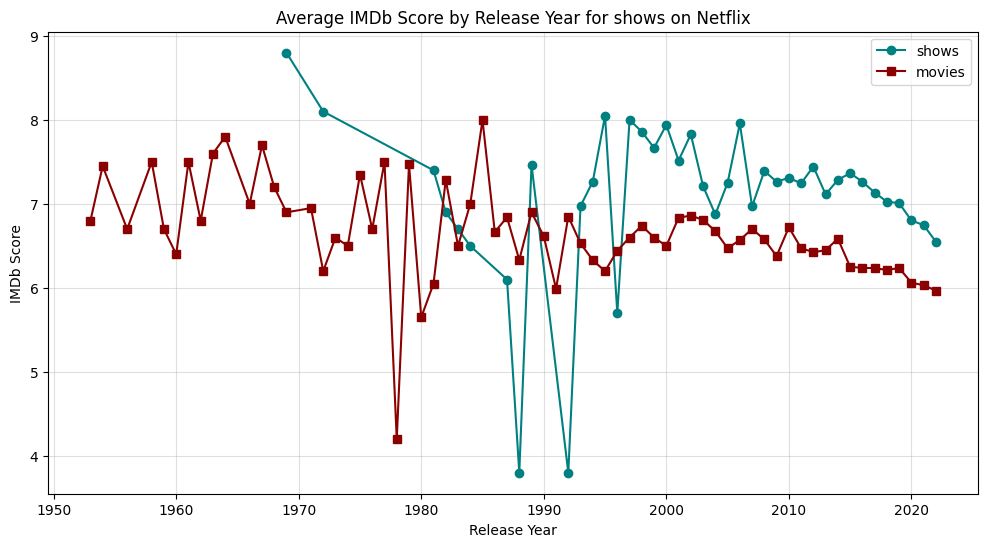

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(
    shows_df_mean.index,
    shows_df_mean,
    color="teal",
    marker="o",
    label="shows"
)

plt.plot(
    movies_df_mean.index,
    movies_df_mean,
    color="darkred",
    marker="s",
    label="movies"
)

plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.title("Average IMDb Score by Release Year for shows on Netflix")
plt.grid(True, alpha=.4)
plt.legend()
#1978 only one movie "Bandie"

## Q2: Do movies (a) or shows (b) on Netflix with a more positive description get better IMDb ratings?

In [7]:
#BERT model (used because it performed the best in A3)
sentiment_pipeline = pipeline(model=f"cardiffnlp/twitter-roberta-base-sentiment-latest")

movies_df = movies_df.dropna(subset=["description"]) 
movies_class = sentiment_pipeline(movies_df["description"].to_list())
movies_df["Bert_class"] = [result["label"] for result in movies_class]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
#BERT model (used because it performed the best in A3)
sentiment_pipeline = pipeline(model=f"cardiffnlp/twitter-roberta-base-sentiment-latest")

shows_df = shows_df.dropna(subset=["description"]) 
shows_class = sentiment_pipeline(shows_df["description"].to_list())
shows_df["Bert_class"] = [result["label"] for result in shows_class]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\Users\danie\AppData\Local\Temp\ipykernel_8752\3968437651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

Levene's Test Statistic: 0.2647494733618372
Levene's Test p-value: 0.7676369031550685
There is no significant evidence to reject the null hypothesis of equal variances.

One-way ANOVA Results:
F-statistic: 3.98
p-value: 0.020

The p-value (0.020) is less than 0.05.
There is a statistically significant difference in imdb_score across sentiment categories.

Summary Statistics:
            count  mean  median   std  min  max
Bert_class                                     
negative       65  6.90     6.8  0.75  4.8  8.6
neutral       139  7.06     7.1  0.76  5.1  8.8
positive       24  7.41     7.4  0.69  6.2  8.8

Tukey's HSD Pairwise Comparisons:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
negative  neutral   0.1537  0.361 -0.1119 0.4192  False
negative positive   0.5037 0.0146  0.0816 0.9259   True
 neutral positive   0.3501 0.0893 -0.0406 0.7407  False
-----------

<Figure size 1200x800 with 0 Axes>

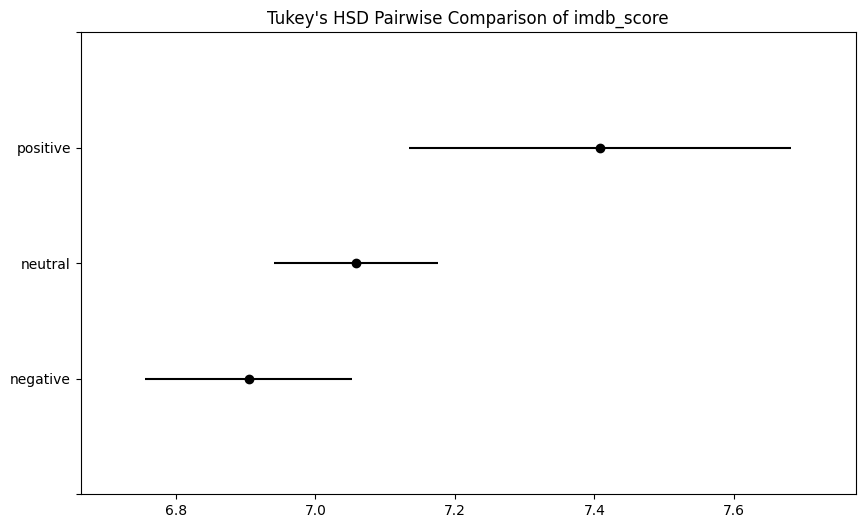

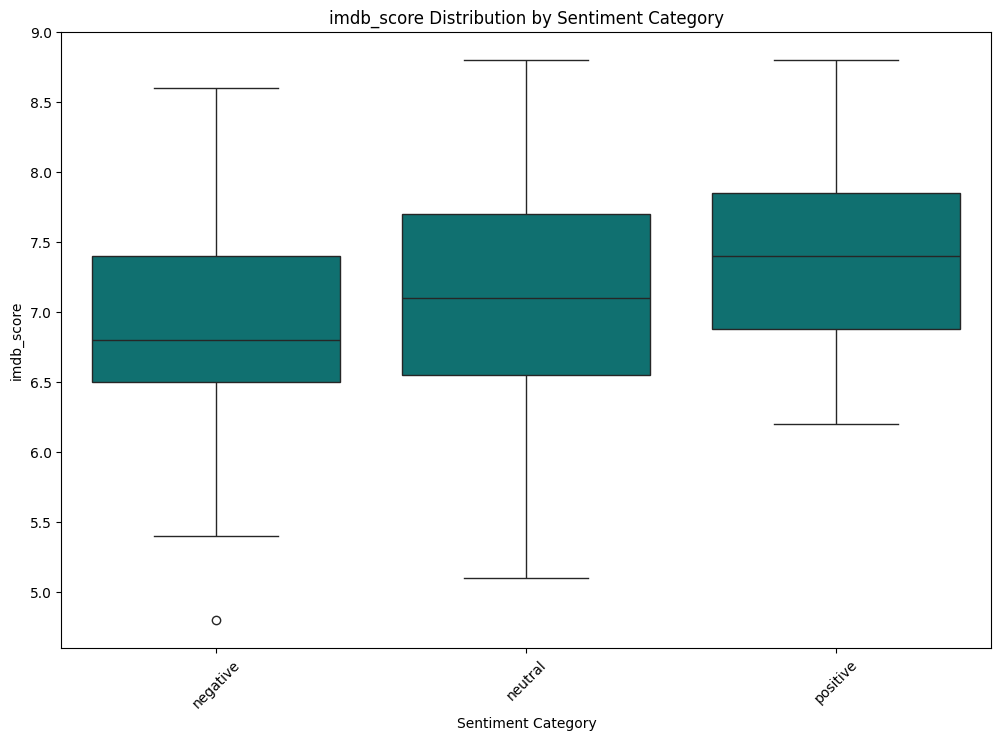

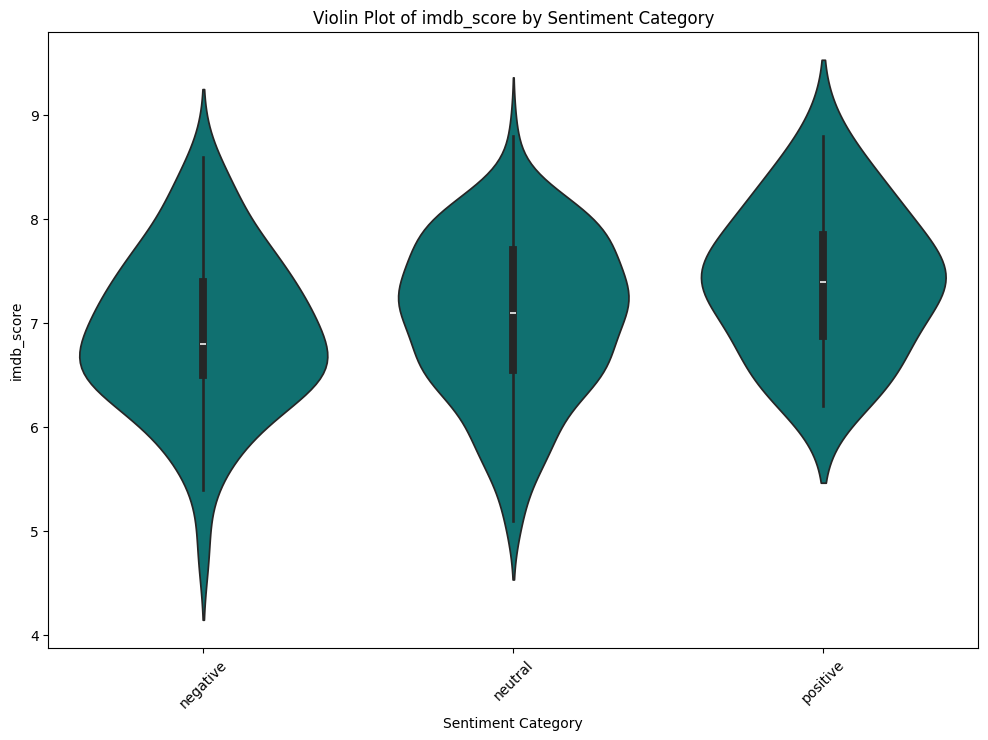

In [44]:
def sentiment_anova(data: pd.DataFrame, column: str) -> None:
    
    # One-way ANOVA
    # Group the data by sentiment category
    sentiment_groups = [group[column].values for name, group in data.groupby("Bert_class", observed=False)]

    
    # Perform Levene's test
    stat, p_value = levene(*sentiment_groups)

    # Print results
    print(f"Levene's Test Statistic: {stat}")
    print(f"Levene's Test p-value: {p_value}")

    # Interpretation
    if p_value < 0.05:
        print("There is significant evidence to reject the null hypothesis of equal variances.")
    else:
        print("There is no significant evidence to reject the null hypothesis of equal variances.")
    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(*sentiment_groups)

    # Print ANOVA results
    print("\nOne-way ANOVA Results:")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"p-value: {p_value:.3f}")

    # Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print(f"\nThe p-value ({p_value:.3f}) is less than {alpha}.")
        print(f"There is a statistically significant difference in {column} across sentiment categories.")
    else:
        print(f"\nThe p-value ({p_value:.3f}) is greater than {alpha}.")
        print(f"There is no statistically significant difference in {column} across sentiment categories.")


    # Perform Tukey's HSD Test for pairwise comparisons
    tukey_results = pairwise_tukeyhsd(
        endog=data[column],  # dependent variable
        groups=data["Bert_class"],  # grouping variable
        alpha=0.05  # significance level
    )

    # Summary statistics
    summary_stats = data.groupby("Bert_class", observed=False)[column].agg([
        ("count", "count"),
        ("mean", "mean"),
        ("median", "median"),
        ("std", "std"),
        ("min", "min"),
        ("max", "max")
    ])
    summary_stats = summary_stats.round(2)
    print("\nSummary Statistics:")
    print(summary_stats)

    # Print Tukey's HSD results
    print("\nTukey's HSD Pairwise Comparisons:")
    print(tukey_results)

    # Visualization of Tukey's HSD results
    plt.figure(figsize=(12, 8))
    tukey_results.plot_simultaneous()
    plt.title(f"Tukey's HSD Pairwise Comparison of {column}")

    # Visualization of distribution
    plt.figure(figsize=(12, 8))
    sns.boxplot(x="Bert_class", y=column, data=data, color="teal")
    plt.title(f"{column} Distribution by Sentiment Category")
    plt.xlabel("Sentiment Category")
    plt.ylabel(column)
    plt.xticks(rotation=45)

    # Additional diagnostic plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x="Bert_class", y=column, data=data, color="teal")
    plt.title(f"Violin Plot of {column} by Sentiment Category")
    plt.xlabel("Sentiment Category")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    
    return None

sentiment_anova(movies_df, "imdb_score")

Levene's Test Statistic: 7.276602986739162
Levene's Test p-value: 0.000711266030574913
There is significant evidence to reject the null hypothesis of equal variances.

One-way ANOVA Results:
F-statistic: 4.01
p-value: 0.018

The p-value (0.018) is less than 0.05.
There is a statistically significant difference in imdb_score across sentiment categories.

Summary Statistics:
            count  mean  median   std  min  max
Bert_class                                     
negative      363  7.05     7.2  0.99  2.3  9.5
neutral      1114  7.06     7.2  1.06  1.6  9.6
positive      398  6.88     7.0  1.21  2.3  9.6

Tukey's HSD Pairwise Comparisons:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
negative  neutral   0.0096  0.988 -0.1432  0.1625  False
negative positive  -0.1649 0.0885 -0.3485  0.0186  False
 neutral positive  -0.1746 0.0155 -0.3222 -0.0269   True
-------

<Figure size 1200x800 with 0 Axes>

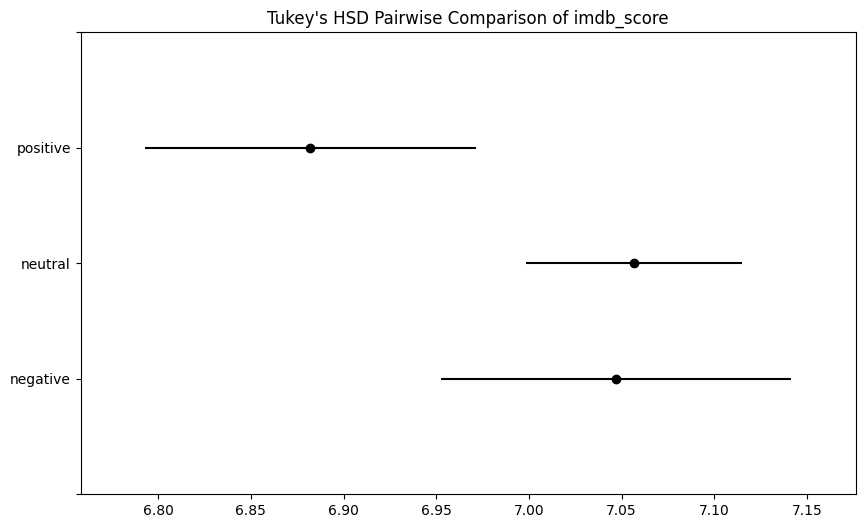

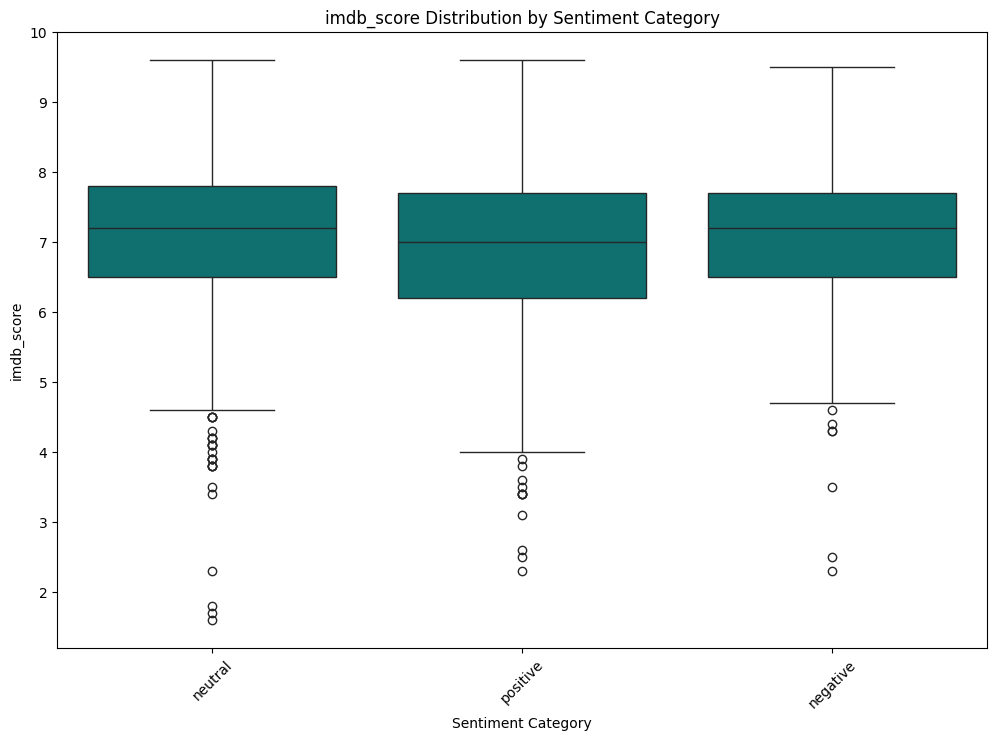

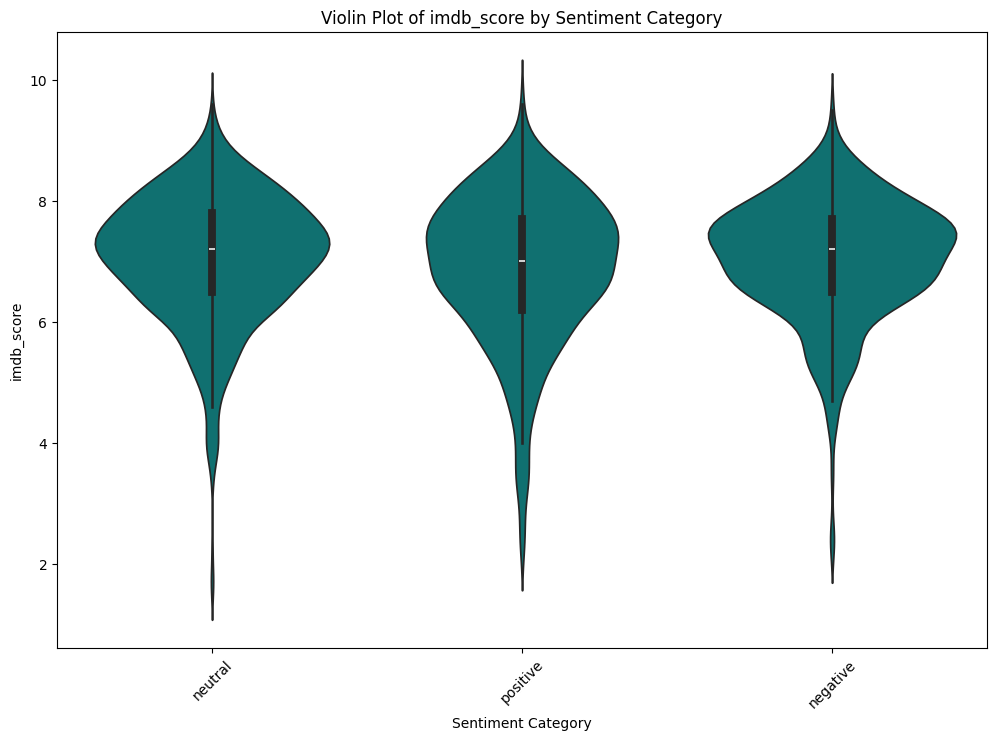

In [41]:
sentiment_anova(shows_df, "imdb_score")